# <font color=blue> Imports Help Run on Own Laptop or Google's Colab </font>

In [1]:
import sys
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True  
if OWN_INSTALL:
    print("Running on own machine. Include # sys.path[0:0] = [ '..', '../3rdparty' ] .. as needed")
    sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                     '../../../..',  '../../../../3rdparty',  
                     '../../..',     '../../../3rdparty', 
                     '../..',        '../../3rdparty',
                     '..',           '../3rdparty']

else:
    ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
    sys.path.append('./Jove')       # Set paths for Colab
    sys.path.append('./Jove/jove')
# -- Now include common imports - either here, or just before when needed --

# -- these are almost always needed  
from jove.Def_md2mc  import * # -- to convert markdowns to machines
from jove.DotBashers import * # -- to draw machines
from jove.Def_RE2NFA import *

Running on own machine. Include # sys.path[0:0] = [ '..', '../3rdparty' ] .. as needed
You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)

# <font color=blue> Overview of Jove </font>

### * Jove Helps Teach Automata and Computability Interactively

### * No Software Installation - Runs on Colab under Jupyter Notebooks

### * Supports Machine Construction, Animation, Property Checking

### * Assignments Delivered via Half-Filled Notebooks - Finished by Students

### * Helps Teach Practical, Formal Aspects - e.g. Parsing, Ambiguity, Decision Diagrams

### * Students Appreciate How Theory Turns into Practice

### * Community Contributed Problems a Possibility



# <font color=blue> The Full Animation Panel </font>

### This animation panel was written by Paul C.J. Carlson and presents all of Jove's Machines in one panel.

In [2]:
from jove.JoveEditor import *
JoveEditor(examples=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

 "help(JoveEditor)" gives you info on the generic animation panel that animates all machines. 


# <font color=blue> Define and Draw Machines </font>

### One can define and draw individual machines also, well documented!

In [3]:
DFA010 = md2mc('''
DFA

!! Overall plans: Name states to reflect information being recorded

!! The initial state is not final, since a 010 has not been seen.
!! Thus the initial state name is "I" and not "IF"

!! Below, with each state such as I or S0, we provide both the moves out of it
!! For larger alphabets, provide all the moves in a bunch. 

!! We prefer to first list moves that are not too interesting; this way you can 
!! forget those cases and move on.

I : 1 -> I  !! Upon a '1', no progress toward 010, so throw '1' away
I : 0 -> S0 !! '0' is interesting, as it is progressing toward 010; record it in the state

S0 : 0 -> S0  !! No further progress, but progress so far is not lost either; stay at S0
S0 : 1 -> S01 !! Now progress toward 010

S01 : 1 -> I !! A "spoiler" of a '1' is seen. We revert back to I and start all over.
S01 : 0 -> F !! Seen a 010. No more work to do!

F : 0|1 -> F  !! Remain at F, having seen a 010
''')

Generating LALR tables


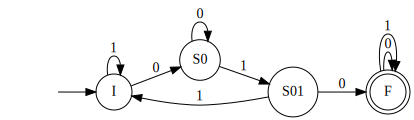

In [4]:
dotObj_dfa(DFA010)

### Fuse the Edges for Neatness

We like to see all the edges separately to see "it is all there". 
After that, we want to fuse multiple edges between states. The
"FuseEdges=True" below accomplishes that.

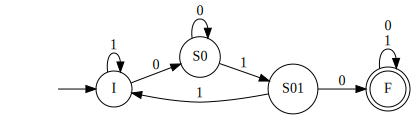

In [5]:
dotObj_dfa(DFA010, FuseEdges=True)

### Running DFA

Now, we can step_dfa, run_dfa, and check for acceptance.

In [6]:
from jove.Def_DFA import *

In [7]:
accepts_dfa(DFA010, "0110010")

True

### Testing the DFA in Numeric Order

Testing a DFA according to strings in numeric order is a good idea,
as it ekes out bugs with respect to short strings. Usually DFAs are
"good" if they work for "all short strings" (or almost all). For this,
we include LangDefs that defines "nthnumeric"

In [8]:
from jove.LangDef import *

You may use any of these help commands:
help(lphi)
help(lunit)
help(lcat)
help(lexp)
help(lunion)
help(lstar)
help(srev)
help(lrev)
help(shomo)
help(lhomo)
help(powset)
help(lint)
help(lsymdiff)
help(lminus)
help(lissubset)
help(lissuperset)
help(lcomplem)
help(product)
help(nthnumeric)



In [9]:
help(nthnumeric)

Help on function nthnumeric in module jove.LangDef:

nthnumeric(N, S=['a', 'b'])
    Assume S ('Sigma') is a 2-sized list of chars (default ['a','b']). 
    Produce the Nth string in numeric order, where N >= 0.
    Idea : Given N, get b = floor(log_2(N+1)) - need that 
    many places; what to fill in the places is the binary 
    code for N - (2^b - 1) with 0 as S[0] and 1 as S[1].



In [10]:
TestStrings = [nthnumeric(i, ['0','1']) for i in range(32)]

TestStrings # All binary strings in length-order with lexicographic ordering per length group

In [11]:
for test in TestStrings:
    if accepts_dfa(DFA010, test):
        print("DFA010 accepts ", test)
    else:
        print("DFA010 rejects ", test)    

DFA010 rejects  
DFA010 rejects  0
DFA010 rejects  1
DFA010 rejects  00
DFA010 rejects  01
DFA010 rejects  10
DFA010 rejects  11
DFA010 rejects  000
DFA010 rejects  001
DFA010 accepts  010
DFA010 rejects  011
DFA010 rejects  100
DFA010 rejects  101
DFA010 rejects  110
DFA010 rejects  111
DFA010 rejects  0000
DFA010 rejects  0001
DFA010 accepts  0010
DFA010 rejects  0011
DFA010 accepts  0100
DFA010 accepts  0101
DFA010 rejects  0110
DFA010 rejects  0111
DFA010 rejects  1000
DFA010 rejects  1001
DFA010 accepts  1010
DFA010 rejects  1011
DFA010 rejects  1100
DFA010 rejects  1101
DFA010 rejects  1110
DFA010 rejects  1111
DFA010 rejects  00000


### Use of Filter to Pick Out All Strings Accepted

While testing as above is reassuring, it is often a good idea to pick out
the essence of a machine using the Python 'filter' command. See an example
below. You can learn about Python functions and features 
from [a good Python tutorial](https://www.python-course.eu)

In [12]:
list(filter(lambda x: accepts_dfa(DFA010, x), TestStrings))

['010', '0010', '0100', '0101', '1010']

## Animate Individual Machines

This is how you can individually animate DFA created thus far

In [13]:
from jove.AnimateDFA import *
AnimateDFA(DFA010, FuseEdges=False)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

# <font color=blue> One can teach basic concepts thru Jupyter Widgets </font>

In [14]:
import ipywidgets as wdg
L1 = {'a','bc'}
L2 = {'ab','bc'}
L3 = {'a','b','c'}
M =  {'011', '111', '11', '0111', '00111', '1'}

wdg.interact(lstar,
L={'L3': L3, 'L1': L1, 'L2':L2, 'M': M, 'lphi': lphi(), 'lunit' : lunit()}, n=(0,7))

interactive(children=(Dropdown(description='L', options={'L3': {'b', 'c', 'a'}, 'L1': {'bc', 'a'}, 'L2': {'bc'…

<function jove.LangDef.lstar(L, n)>

# <font color=blue> One can teach practical concepts - Parsing </font>

### See Calculator_with_Parse_Tree_Drawing.ipynb 

# <font color=blue> Teach Machine Conversions and Property Checking </font>

In [20]:
re2nfa("(a*b*)*")

{'Q': {'St1', 'St2', 'St3', 'St4', 'St5', 'St6', 'St7'},
 'Sigma': {'a', 'b'},
 'Delta': {('St7', ''): {'St3'},
  ('St3', ''): {'St1', 'St6'},
  ('St1', 'a'): {'St2'},
  ('St2', ''): {'St3'},
  ('St6', ''): {'St4', 'St7'},
  ('St4', 'b'): {'St5'},
  ('St5', ''): {'St6'}},
 'Q0': {'St7'},
 'F': {'St7'}}

In [15]:
md = min_dfa(nfa2dfa(re2nfa("(a*b*)*")))

In [16]:
md_alt = nfa2dfa(re2nfa("(a+b)*"))

In [17]:
langeq_dfa(md, md_alt)

True

In [18]:
iso_dfa(md, md_alt)

False

In [19]:
help(iso_dfa)

Help on function iso_dfa in module jove.Def_DFA:

iso_dfa(D1, D2)
    Given consistent and total DFAs D1 and D2,
    check whether they are isomorphic. Two DFAs
    are isomorphic if they have the same number
    of states and are language-equivalent. (One would
    then be able to match-up state for state and transition
    for transition.)

